In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import os

In [4]:
resumeDataSet = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [5]:
resumeDataSet

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
series = resumeDataSet['Category'].value_counts()
resumeDataSet_result = pd.DataFrame(series)
resumeDataSet_result = resumeDataSet_result.reset_index()  
resumeDataSet_result.columns = ['Category', 'Total']
print(resumeDataSet_result)

                     Category  Total
0              Java Developer     84
1                     Testing     70
2             DevOps Engineer     55
3            Python Developer     48
4               Web Designing     45
5                          HR     44
6                      Hadoop     42
7                  Blockchain     40
8               ETL Developer     40
9          Operations Manager     40
10               Data Science     40
11                      Sales     40
12        Mechanical Engineer     40
13                       Arts     36
14                   Database     33
15     Electrical Engineering     30
16         Health and fitness     30
17                        PMO     30
18           Business Analyst     28
19           DotNet Developer     28
20         Automation Testing     26
21  Network Security Engineer     25
22              SAP Developer     24
23             Civil Engineer     24
24                   Advocate     20


In [7]:
import plotly.express as px
rd_result_part = resumeDataSet_result.head(21)
fig = px.pie(rd_result_part,
                 values='Total',
                 names='Category')

fig.show()

In [8]:
fig = px.histogram(
    resumeDataSet, x="Category",
    color = 'Category', 
    title="Distribution of Jobs Categories"
)
fig.show()

In [9]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [10]:
resumeDataSet

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skill Proficient in MS office ...
958,Testing,â Willingness to accept the challenges. â ...,Willingne to a ept the challenge Po...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerne...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


In [11]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [12]:
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [13]:
# test train split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)

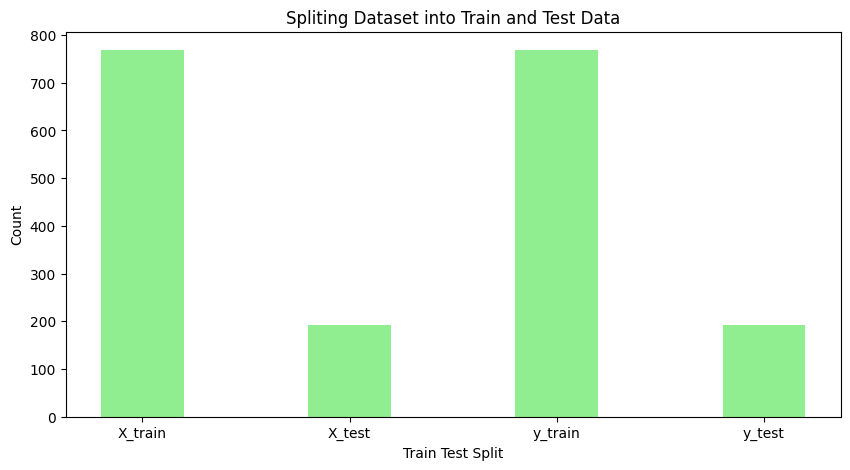

In [14]:
values = [X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]]
v = [1,2,3,4]
name = ['X_train','X_test','y_train','y_test']
fig = plt.figure(figsize = (10, 5))
plt.bar(name,values, color ='lightgreen',width = 0.4)
plt.xlabel("Train Test Split")
plt.ylabel("Count")
plt.title("Spliting Dataset into Train and Test Data")
plt.show()

# **Linear Regresion**

In [15]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
pred = model.predict(X_test)
flat_array = pred.flatten()

In [17]:
print(model.score(X_train, y_train))
acc = model.score(X_test, y_test)
print("accuracy is: ",acc)

0.9999999999453002
accuracy is:  0.9957733759261626


# **Decision Tree**

In [18]:
from sklearn import tree
from sklearn.metrics import accuracy_score
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)
print("accuracy is: ",acc2)

accuracy is:  1.0


# **KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7)
knc = knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)
print("accuracy is: ",acc3)

accuracy is:  0.9740932642487047


# **Comparing Models**

**Accuracy**

linear regresion : 99.5%

Decision Tree : 100%

KNN : 97.4% 

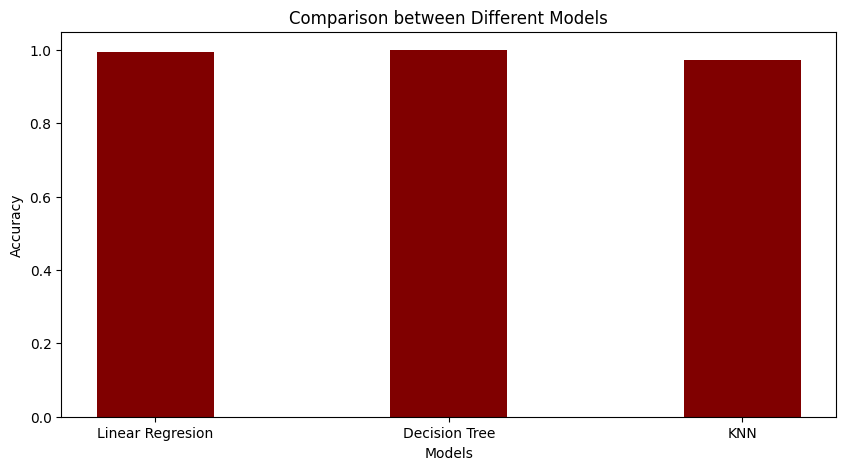

In [20]:
accuracy = [acc,acc2,acc3]
models = ['Linear Regresion','Decision Tree','KNN']
fig = plt.figure(figsize = (10, 5))
plt.bar(models,accuracy, color ='maroon',width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison between Different Models")
plt.show()